<a href="https://colab.research.google.com/github/invoker-qqwrv/Beida_tensorflow/blob/main/3_3MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 手写数字识别
import tensorflow as tf
from matplotlib import pyplot as plt
mnist=tf.keras.datasets.mnist#导入mnist数据集
(x_train,y_train),(x_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# 作为输入特征输入nn时，将数据拉伸为一维数组
# tf.keras.layers.Flatten()

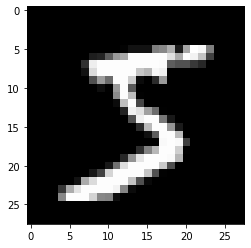

In [2]:
# 可视化训练集输入特征的第一个元素
plt.imshow(x_train[0],cmap='gray')  # 绘制灰度图
plt.show()

In [3]:
print("x_train[0]:\n", x_train[0])
# 打印出训练集标签的第一个元素.是一个28*28的二维数组。0为纯黑，255纯白

x_train[0]:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 2

In [4]:
print("y_train[0]:\n", y_train[0])#打印训练集的标签

y_train[0]:
 5


In [5]:
# 打印出整个训练集输入特征形状
print("x_train.shape:\n", x_train.shape)
# 六万个28*28的输入

x_train.shape:
 (60000, 28, 28)


In [6]:
# 打印出整个训练集标签的形状
print("y_train.shape:\n", y_train.shape)

y_train.shape:
 (60000,)


In [7]:
# 打印出整个测试集输入特征的形状
print("x_test.shape:\n",x_test.shape)

x_test.shape:
 (10000, 28, 28)


In [8]:
# 打印出整个测试集标签的形状
print("y_test.shape:\n",y_test.shape)

y_test.shape:
 (10000,)


In [10]:
# 实现手写数字识别
import tensorflow as tf

mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0#归一化

model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),#把输入特征拉直为一维数组。748个数值
    tf.keras.layers.Dense(128,activation='relu'),#第一层有128个神经元。
    tf.keras.layers.Dense(10,activation='softmax')#十个神经元，用softmax函数使输出符合概率分布
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),#如果输出不满足概率分布，这里要写true
              metrics=['sparse_categorical_accuracy'])#标签是数值，输出是概率分布，所以这里这么选
model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_test,y_test),validation_freq=1)
model.summary()

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2612 - sparse_categorical_accuracy: 0.9262 - val_loss: 0.1374 - val_sparse_categorical_accuracy: 0.9602
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1159 - sparse_categorical_accuracy: 0.9664 - val_loss: 0.0944 - val_sparse_categorical_accuracy: 0.9705
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0789 - sparse_categorical_accuracy: 0.9762 - val_loss: 0.0866 - val_sparse_categorical_accuracy: 0.9726
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0587 - sparse_categorical_accuracy: 0.9819 - val_loss: 0.0714 - val_sparse_categorical_accuracy: 0.9770
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0461 - sparse_categorical_accuracy: 0.9858 - val_loss: 0.0712 - val_sparse_categorical_accuracy: 0.9769
Model: "sequential"
_________________________________________________________________
 Layer (t